# **Titanic Survive Prediction**
By- Vishwas Anil Kumar

## **Libraries Used**

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## **About Traning Dataset**

In [7]:
col_names = ['PassengerId', 'Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

training_data = pd.read_csv('train.csv',names = col_names,skiprows = 1)

print(training_data.shape)
training_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
training_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
training_data.isnull().values.any()

True

In [13]:
training_data[training_data.isnull().any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [14]:
np.sum(training_data.isnull().any(axis=1))

708

In [17]:
print("Missing values in Training Set")
print(training_data.isnull().sum())

Missing values in Training Set
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


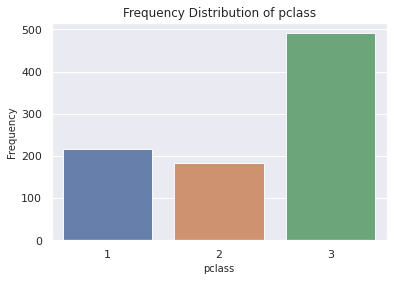

In [20]:
carrier_count = training_data["Pclass"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of pclass')
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('pclass', fontsize=10)
plt.show()

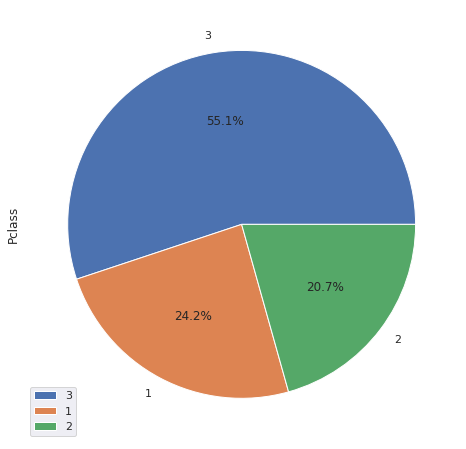

In [22]:
training_data["Pclass"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


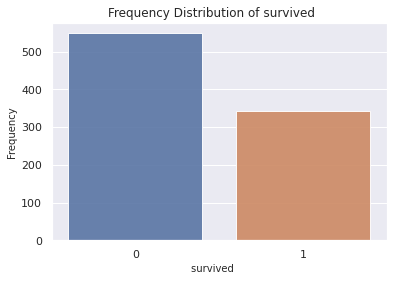

In [24]:
carrier_count = training_data["Survived"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of survived    ')
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('survived    ', fontsize=10)
plt.show()

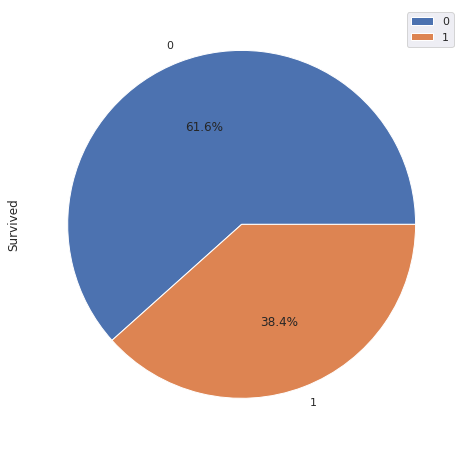

In [25]:
training_data["Survived"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

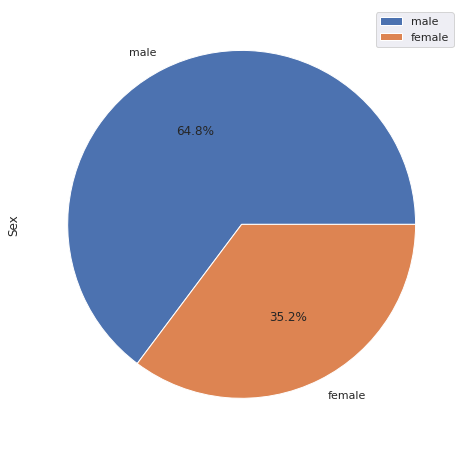

In [26]:
training_data["Sex"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

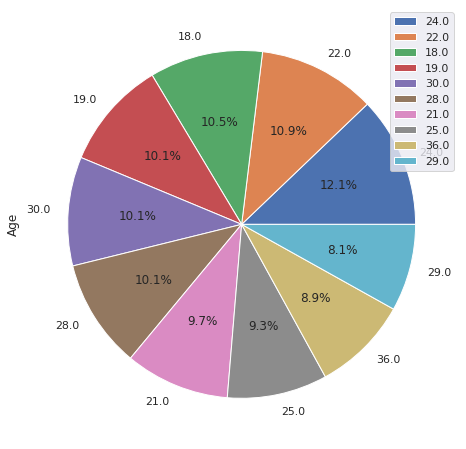

In [27]:
training_data["Age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

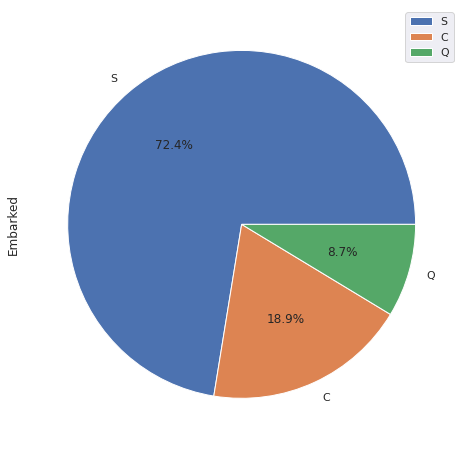

In [29]:
training_data["Embarked"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

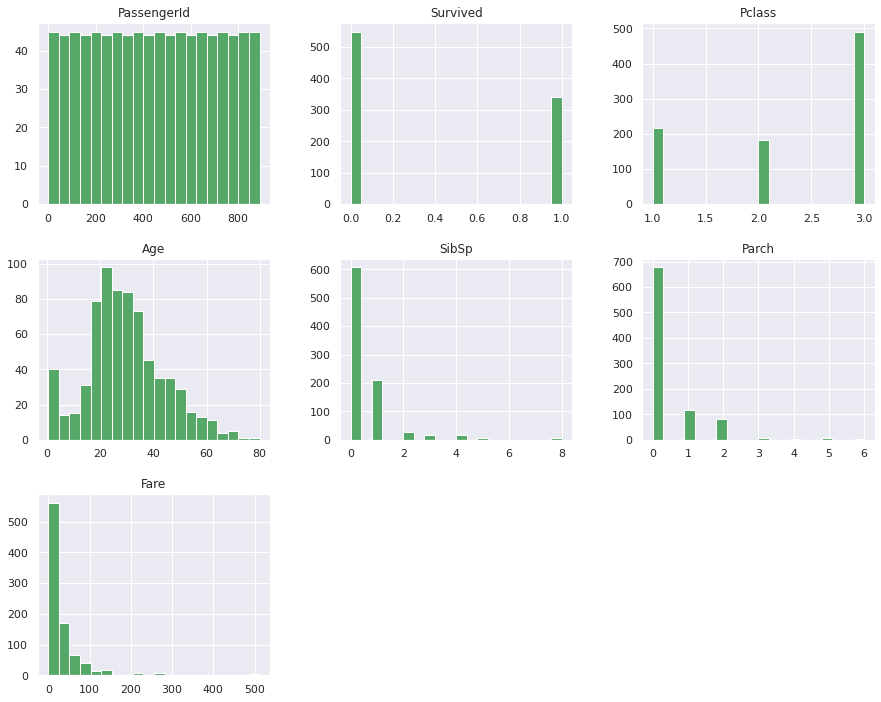

In [35]:
training_data.hist(figsize=(15,12),bins = 20, color="g")
plt.title("Features Distribution")
plt.show()

## **About Test Dataset**

In [89]:
col_names = ['PassengerId', 'Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

test_data = pd.read_csv('test.csv',names = col_names,skiprows = 1)
print(test_data.shape)
test_data.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [91]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [92]:
test_data.isnull().values.any()

True

In [93]:
test_data[test_data.isnull().any(axis=1)].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
np.sum(test_data.isnull().any(axis=1))

331

In [95]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


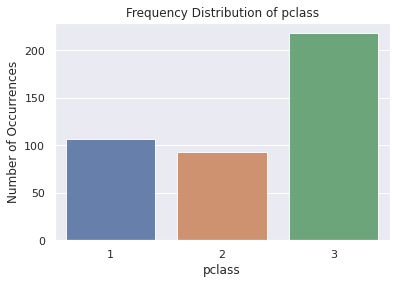

In [96]:
carrier_count = test_data["Pclass"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of pclass')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('pclass', fontsize=12)
plt.show()

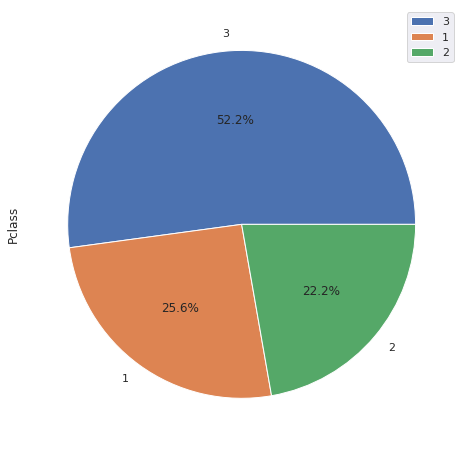

In [97]:
test_data["Pclass"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

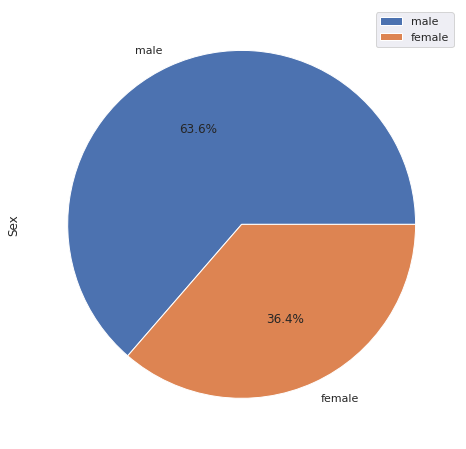

In [98]:
test_data["Sex"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

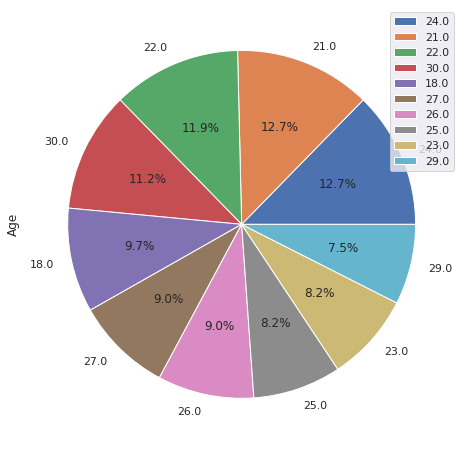

In [99]:
test_data["Age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

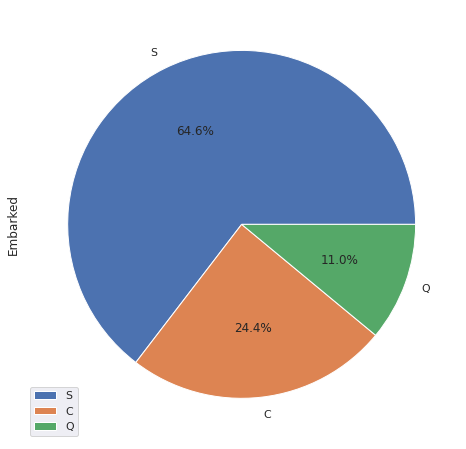

In [100]:
test_data["Embarked"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

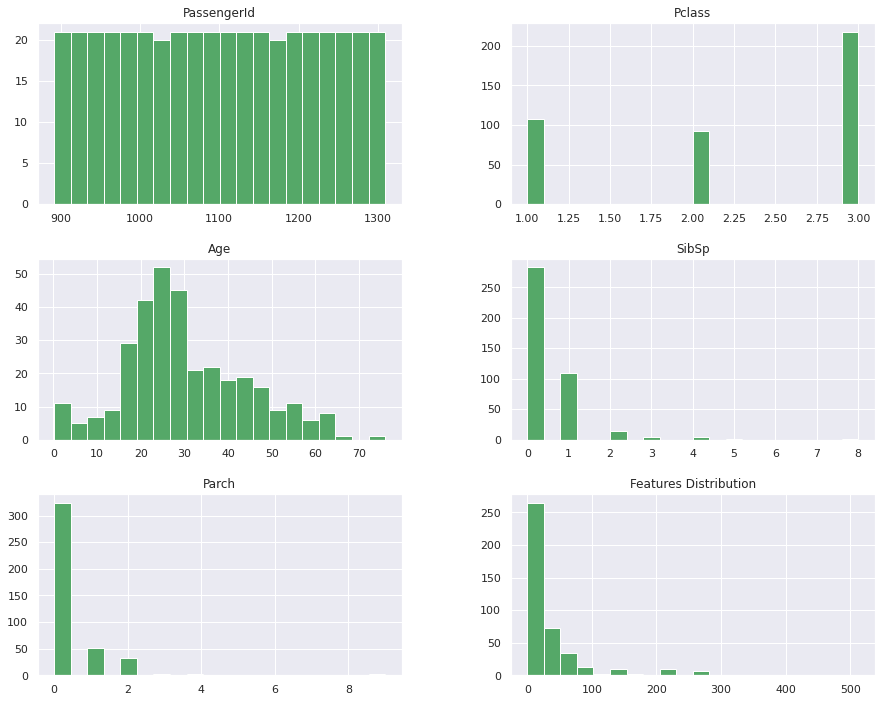

In [101]:
test_data.hist(figsize=(15,12),bins = 20, color="g")
plt.title("Features Distribution")
plt.show()

## **Co-relation Between features and their dependencies**

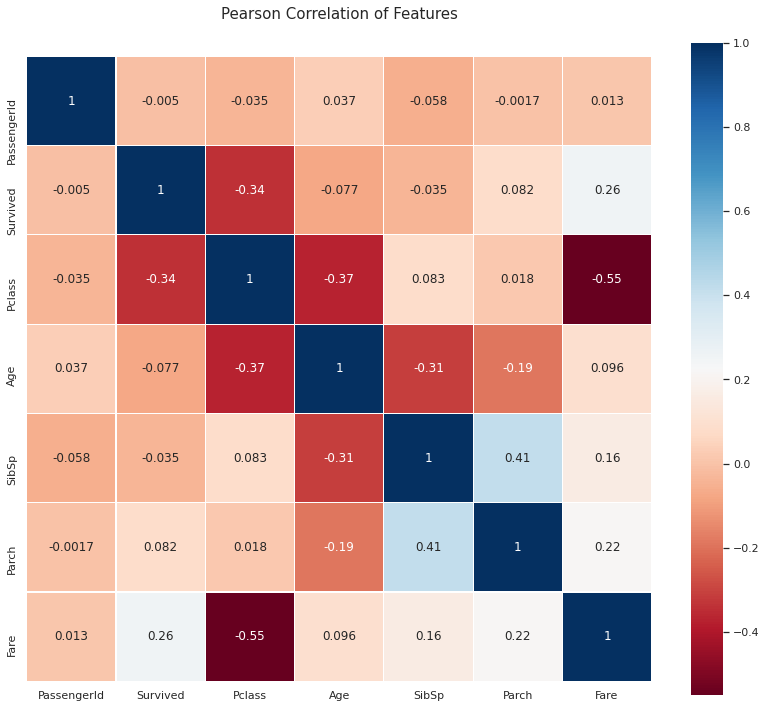

In [102]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(training_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [103]:
print("As we can see from the graphs, features has good correlation with Pclass")

As we can see from the graphs, features has good correlation with Pclass


In [104]:
training_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [105]:
print("We can see that the correlation of Sex with survived is more than 0.5 among Sex=female so we are going to add this feature in training")

We can see that the correlation of Sex with survived is more than 0.5 among Sex=female so we are going to add this feature in training


In [106]:
training_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [107]:
print("We can see that the siblling with 1 is high correlated with survival but others are lower and zero")

We can see that the siblling with 1 is high correlated with survival but others are lower and zero


In [108]:
training_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [109]:
print("We can see that the Parch with 1 and 2 is high correlated with survival but others are lower and zero")

We can see that the Parch with 1 and 2 is high correlated with survival but others are lower and zero


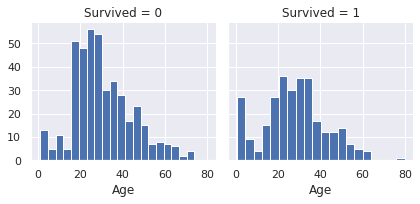

In [110]:
g = sns.FacetGrid(training_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


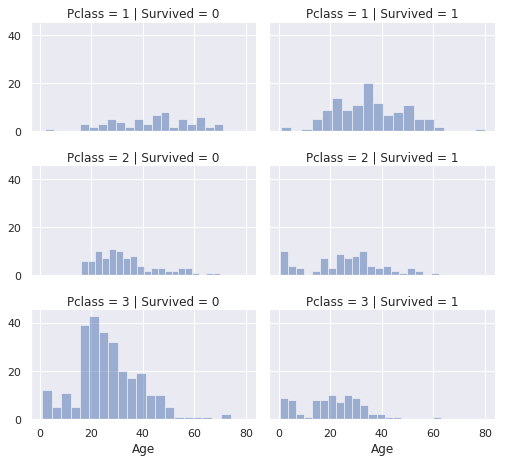

In [111]:
grid = sns.FacetGrid(training_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [112]:
print("Pclass=3 had most passengers, however most did not survive.\nInfant passengers in Pclass=2 and Pclass=3 mostly survived.\nMost passengers in Pclass=1 survived. \nPclass varies in terms of Age distribution of passengers.")

Pclass=3 had most passengers, however most did not survive.
Infant passengers in Pclass=2 and Pclass=3 mostly survived.
Most passengers in Pclass=1 survived. 
Pclass varies in terms of Age distribution of passengers.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


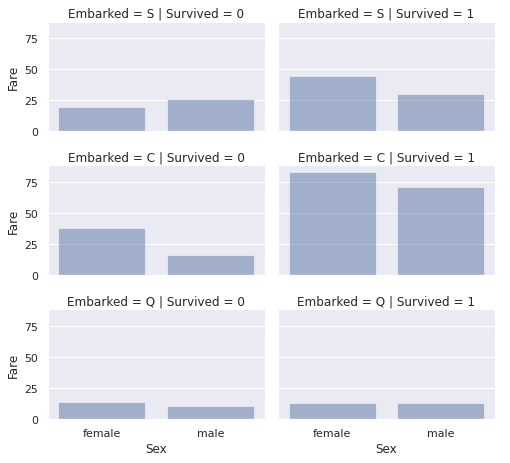

In [113]:
grid = sns.FacetGrid(training_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [114]:
print("Higher fare paying passengers had better survival.\nPort of embarkation correlates with survival rates.")

Higher fare paying passengers had better survival.
Port of embarkation correlates with survival rates.


In [115]:
y = training_data["Survived"]

In [116]:
all_data = pd.concat([training_data,test_data],axis=0).reset_index(drop=True)

In [117]:
all_data = all_data.drop(["Survived","PassengerId"],axis=1)

## **Missing Values**

In [118]:
def missing_value(df):
    number = df.isnull().sum().sort_values(ascending=False)
    number = number[number > 0]
    percentage = df.isnull().sum() *100 / df.shape[0]
    percentage = percentage[percentage > 0].sort_values(ascending=False)
    return  pd.concat([number,percentage],keys=["Total","Percentage"],axis=1)
missing_value(all_data)

,Total,Percentage
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


In [119]:
## Imputing the missing values with the Mode because mode fill the values with the most accuring values and best for the categorical features
all_data["Cabin"] = all_data["Cabin"].transform(lambda x: x.fillna(x.mode()[0]))

In [120]:
all_data["Embarked"] = all_data["Embarked"].transform(lambda x: x.fillna(x.mode()[0]))

In [121]:
#Mapping the Age into 5 groups from 0 to 4
all_data['Age']=all_data.loc[ all_data['Age'] <= 16, 'Age'] = 0
all_data['Age']=all_data.loc[(all_data['Age'] > 16) & (all_data['Age'] <= 32), 'Age'] = 1
all_data['Age']=all_data.loc[(all_data['Age'] > 32) & (all_data['Age'] <= 48), 'Age'] = 2
all_data['Age']=all_data.loc[(all_data['Age'] > 48) & (all_data['Age'] <= 64), 'Age'] = 3
all_data['Age']=all_data.loc[ all_data['Age'] > 64, 'Age'] = 4 

In [122]:
all_data['Fare']=all_data.loc[ all_data['Fare'] <= 7.91, 'Fare'] = 0
all_data['Fare']=all_data.loc[(all_data['Fare'] > 7.91) & (all_data['Fare'] <= 14.454), 'Fare'] = 1
all_data['Fare']=all_data.loc[(all_data['Fare'] > 14.454) & (all_data['Fare'] <= 31), 'Fare']   = 2
all_data['Fare']=all_data.loc[ all_data['Fare'] > 31, 'Fare'] = 3
all_data['Fare']=all_data['Fare'] = all_data['Fare'].astype(int)

In [123]:
missing_value(all_data)

,Total,Percentage


## **Splitting of Dataset**

In [124]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [125]:
n = len(y)
train_data = all_data[:n]
test_data = all_data[n:]

In [126]:
X = np.array(train_data)
y = np.array(y)

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

## **Model**

In [131]:
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Accuracy Score:",model.score(x_test,y_test))
cross = cross_val_score(model, x_test, y_test, cv=5)
print("Cross Validation Score:",cross.mean())
print("Mean Absolute Error :",mean_absolute_error(y_test, predictions))

Accuracy Score: 0.7661016949152543
Cross Validation Score: 0.7864406779661017
Mean Absolute Error : 0.23389830508474577


In [134]:
model = LogisticRegression(random_state=1,max_iter=1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Accuracy Score:",model.score(x_test,y_test))
cross = cross_val_score(model, x_test, y_test, cv=5)
print("Cross Validation Score:",cross.mean())
print("Mean Absolute Error :",mean_absolute_error(y_test, predictions))

Accuracy Score: 0.7661016949152543
Cross Validation Score: 0.7559322033898306
Mean Absolute Error : 0.23389830508474577


In [138]:
#Test on Decision Tree
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Accuracy Score:",model.score(x_test,y_test))
cross = cross_val_score(model, x_test, y_test, cv=5)
print("Cross Validation Score:",cross.mean())
print("Mean Absolute Error :",mean_absolute_error(y_test, predictions))

Accuracy Score: 0.7898305084745763
Cross Validation Score: 0.7661016949152543
Mean Absolute Error : 0.21016949152542372


In [142]:
print("The best model is RandomForest as it has best Cross Validation Score")

The best model is RandomForest as it has best Cross Validation Score
